In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

In [2]:
for i in range(45):
    if i==0:
        train = pd.read_pickle('salida/nuevo4d/SICK/TRAIN_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo4d/SICK/TRAIN_'+str(i+1)+'.csv_.pickle')
            train=pd.concat([train,temp])
        except:
            pass

In [3]:
train=train.reset_index(drop=True)
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,verbT,negH,verbH,overlap_ent,clases
0,1.360015,1.408487,1.953,1.379,4.702564,0.000000,1.000000,6,0.142857,0,7,1,7,0.851562,0,,0,,0.0,CONTRADICTION
1,1.483056,2.819508,1.906,1.727,4.697763,0.000000,1.000000,5,0.285714,0,7,2,7,0.865234,0,,0,,0.0,CONTRADICTION
2,1.207685,1.385516,2.352,1.500,4.711790,0.000000,1.000000,3,0.250000,0,4,1,4,0.996875,0,,0,,0.0,ENTAILMENT
3,0.594501,8.454863,1.845,1.731,4.107403,0.004268,0.408989,1,1.500000,0,7,6,4,0.332031,0,,0,,0.0,CONTRADICTION
4,0.637996,8.388835,2.021,1.733,4.093067,0.004256,0.408790,1,1.500000,0,7,6,4,0.497070,0,,0,,0.0,CONTRADICTION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4434,0.307335,5.725039,1.053,1.189,4.010668,0.005047,0.298821,1,1.333333,0,5,4,3,0.208333,0,,0,,0.0,CONTRADICTION
4435,0.092762,4.269938,1.530,1.530,3.776745,0.009273,0.062379,0,1.000000,0,3,3,3,0.125000,0,,1,play,0.0,CONTRADICTION
4436,0.242414,8.491233,1.864,1.864,3.740832,0.005883,0.183112,0,2.000000,1,6,6,3,0.000000,0,,0,,0.0,CONTRADICTION
4437,0.200072,2.877612,1.472,1.295,3.800590,0.005152,0.152763,1,0.400000,0,3,2,5,0.333333,0,,0,,0.0,CONTRADICTION


<Axes: title={'center': 'list_incomp'}, xlabel='clases'>

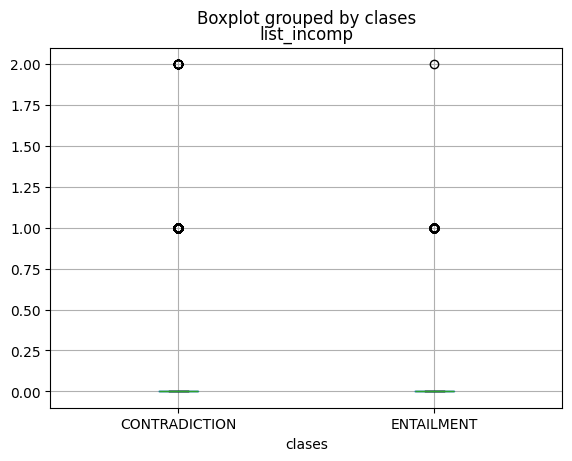

In [4]:
train.boxplot(by="clases",column="list_incomp")

## Eliminar características

In [5]:
# Diferencia entre entropia total - entropias y dejar la columna
# Quitar max_info_p
# revisar scaler y/o normalización de shape con total
#
train=train.drop(["verbH","verbT"],axis=1)
#train=train.drop(["Match"],axis=1)
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases
0,1.360015,1.408487,1.953,1.379,4.702564,0.000000,1.000000,6,0.142857,0,7,1,7,0.851562,0,0,0.0,CONTRADICTION
1,1.483056,2.819508,1.906,1.727,4.697763,0.000000,1.000000,5,0.285714,0,7,2,7,0.865234,0,0,0.0,CONTRADICTION
2,1.207685,1.385516,2.352,1.500,4.711790,0.000000,1.000000,3,0.250000,0,4,1,4,0.996875,0,0,0.0,ENTAILMENT
3,0.594501,8.454863,1.845,1.731,4.107403,0.004268,0.408989,1,1.500000,0,7,6,4,0.332031,0,0,0.0,CONTRADICTION
4,0.637996,8.388835,2.021,1.733,4.093067,0.004256,0.408790,1,1.500000,0,7,6,4,0.497070,0,0,0.0,CONTRADICTION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4434,0.307335,5.725039,1.053,1.189,4.010668,0.005047,0.298821,1,1.333333,0,5,4,3,0.208333,0,0,0.0,CONTRADICTION
4435,0.092762,4.269938,1.530,1.530,3.776745,0.009273,0.062379,0,1.000000,0,3,3,3,0.125000,0,1,0.0,CONTRADICTION
4436,0.242414,8.491233,1.864,1.864,3.740832,0.005883,0.183112,0,2.000000,1,6,6,3,0.000000,0,0,0.0,CONTRADICTION
4437,0.200072,2.877612,1.472,1.295,3.800590,0.005152,0.152763,1,0.400000,0,3,2,5,0.333333,0,0,0.0,CONTRADICTION


In [6]:
train.columns

Index(['sumas', 'distancias', 'entropia_total', 'entropias', 'mutinf',
       'mearts', 'max_info', 'list_comp', 'diferencias', 'list_incomp',
       'list_M', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'negT', 'negH',
       'overlap_ent', 'clases'],
      dtype='object')

In [7]:
#train=train[['list_comp', 'list_incomp','list_m','negT', 'negH',"clases"]]

In [8]:
X = train.drop(['clases'],axis=1)
y_ = train['clases']

In [9]:
# Guardar un nuevo dataframe para la correlación de variables
train_m=train.drop(['clases'],axis=1).corr(method='pearson')

In [10]:
train_m

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent
sumas,1.000000,0.246825,0.292928,0.684379,0.709882,-0.142600,0.937667,-0.074259,0.130587,0.072416,0.227972,0.251821,0.351539,0.061840,-0.107994,0.208897,NaN
distancias,0.246825,1.000000,0.110486,0.684929,0.567901,0.417102,0.222716,-0.643347,0.891755,0.200254,0.511604,0.999520,0.182156,-0.542798,-0.084482,0.020417,NaN
entropia_total,0.292928,0.110486,1.000000,0.417143,0.105973,0.023338,0.184880,0.150453,0.001282,0.114702,0.308367,0.111993,0.311652,0.052431,-0.055767,-0.045094,NaN
entropias,0.684379,0.684929,0.417143,1.000000,0.827063,0.357293,0.630782,-0.458727,0.586546,0.204790,0.332106,0.686287,0.264990,-0.333145,-0.128509,0.103381,NaN
mutinf,0.709882,0.567901,0.105973,0.827063,1.000000,0.408860,0.736704,-0.440411,0.530186,0.168705,0.207321,0.568799,0.150997,-0.281163,-0.162443,0.147579,NaN
mearts,-0.142600,0.417102,0.023338,0.357293,0.408860,1.000000,-0.167783,-0.424501,0.465093,0.271184,0.039734,0.418926,-0.088059,-0.428831,-0.077006,-0.082709,NaN
max_info,0.937667,0.222716,0.184880,0.630782,0.736704,-0.167783,1.000000,-0.110751,0.153309,0.099509,0.153789,0.225152,0.221744,0.075374,-0.110609,0.230184,NaN
list_comp,-0.074259,-0.643347,0.150453,-0.458727,-0.440411,-0.424501,-0.110751,1.000000,-0.706591,-0.174635,0.328015,-0.646290,0.330701,0.623082,0.047675,-0.038220,NaN
diferencias,0.130587,0.891755,0.001282,0.586546,0.530186,0.465093,0.153309,-0.706591,1.000000,0.177811,0.312790,0.896552,-0.172339,-0.584978,-0.069700,0.024088,NaN
list_incomp,0.072416,0.200254,0.114702,0.204790,0.168705,0.271184,0.099509,-0.174635,0.177811,1.000000,0.047812,0.197759,0.038686,-0.111382,-0.027398,-0.022940,NaN


<Axes: >

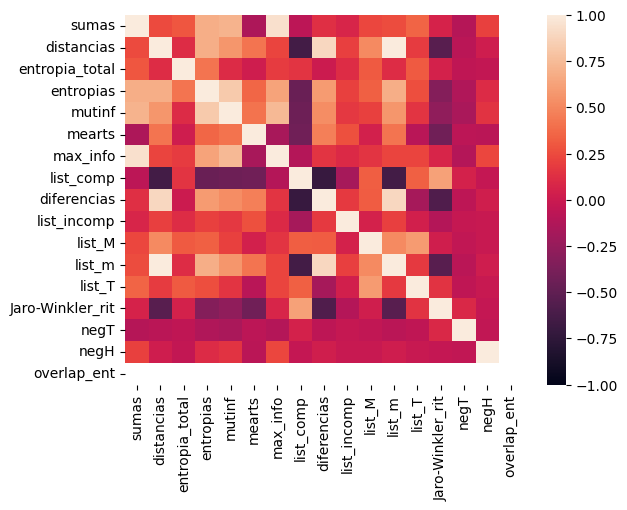

In [11]:
sns.heatmap(train_m,vmin=-1,vmax=1)

In [12]:
train_m.columns

Index(['sumas', 'distancias', 'entropia_total', 'entropias', 'mutinf',
       'mearts', 'max_info', 'list_comp', 'diferencias', 'list_incomp',
       'list_M', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'negT', 'negH',
       'overlap_ent'],
      dtype='object')

In [13]:
train_m

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent
sumas,1.000000,0.246825,0.292928,0.684379,0.709882,-0.142600,0.937667,-0.074259,0.130587,0.072416,0.227972,0.251821,0.351539,0.061840,-0.107994,0.208897,NaN
distancias,0.246825,1.000000,0.110486,0.684929,0.567901,0.417102,0.222716,-0.643347,0.891755,0.200254,0.511604,0.999520,0.182156,-0.542798,-0.084482,0.020417,NaN
entropia_total,0.292928,0.110486,1.000000,0.417143,0.105973,0.023338,0.184880,0.150453,0.001282,0.114702,0.308367,0.111993,0.311652,0.052431,-0.055767,-0.045094,NaN
entropias,0.684379,0.684929,0.417143,1.000000,0.827063,0.357293,0.630782,-0.458727,0.586546,0.204790,0.332106,0.686287,0.264990,-0.333145,-0.128509,0.103381,NaN
mutinf,0.709882,0.567901,0.105973,0.827063,1.000000,0.408860,0.736704,-0.440411,0.530186,0.168705,0.207321,0.568799,0.150997,-0.281163,-0.162443,0.147579,NaN
mearts,-0.142600,0.417102,0.023338,0.357293,0.408860,1.000000,-0.167783,-0.424501,0.465093,0.271184,0.039734,0.418926,-0.088059,-0.428831,-0.077006,-0.082709,NaN
max_info,0.937667,0.222716,0.184880,0.630782,0.736704,-0.167783,1.000000,-0.110751,0.153309,0.099509,0.153789,0.225152,0.221744,0.075374,-0.110609,0.230184,NaN
list_comp,-0.074259,-0.643347,0.150453,-0.458727,-0.440411,-0.424501,-0.110751,1.000000,-0.706591,-0.174635,0.328015,-0.646290,0.330701,0.623082,0.047675,-0.038220,NaN
diferencias,0.130587,0.891755,0.001282,0.586546,0.530186,0.465093,0.153309,-0.706591,1.000000,0.177811,0.312790,0.896552,-0.172339,-0.584978,-0.069700,0.024088,NaN
list_incomp,0.072416,0.200254,0.114702,0.204790,0.168705,0.271184,0.099509,-0.174635,0.177811,1.000000,0.047812,0.197759,0.038686,-0.111382,-0.027398,-0.022940,NaN


In [14]:
coor=pd.DataFrame(np.tril(train_m,-1),index=train_m.columns,columns=train_m.columns)
coor

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent
sumas,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
distancias,0.246825,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
entropia_total,0.292928,0.110486,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
entropias,0.684379,0.684929,0.417143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
mutinf,0.709882,0.567901,0.105973,0.827063,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
mearts,-0.142600,0.417102,0.023338,0.357293,0.408860,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
max_info,0.937667,0.222716,0.184880,0.630782,0.736704,-0.167783,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
list_comp,-0.074259,-0.643347,0.150453,-0.458727,-0.440411,-0.424501,-0.110751,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
diferencias,0.130587,0.891755,0.001282,0.586546,0.530186,0.465093,0.153309,-0.706591,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
list_incomp,0.072416,0.200254,0.114702,0.204790,0.168705,0.271184,0.099509,-0.174635,0.177811,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [15]:
coor.idxmax()

sumas                       max_info
distancias                    list_m
entropia_total             entropias
entropias                     mutinf
mutinf                      max_info
mearts                   diferencias
max_info                        negH
list_comp           Jaro-Winkler_rit
diferencias                   list_m
list_incomp                   list_m
list_M                        list_T
list_m                        list_T
list_T              Jaro-Winkler_rit
Jaro-Winkler_rit                negT
negT                           sumas
negH                           sumas
overlap_ent                    sumas
dtype: object

In [16]:
coor.max()

sumas               0.937667
distancias          0.999520
entropia_total      0.417143
entropias           0.827063
mutinf              0.736704
mearts              0.465093
max_info            0.230184
list_comp           0.623082
diferencias         0.896552
list_incomp         0.197759
list_M              0.589293
list_m              0.174668
list_T              0.142759
Jaro-Winkler_rit    0.086957
negT                0.000000
negH                0.000000
overlap_ent         0.000000
dtype: float64

In [17]:
coor.idxmin()

sumas                         mearts
distancias                 list_comp
entropia_total                  negT
entropias                  list_comp
mutinf                     list_comp
mearts              Jaro-Winkler_rit
max_info                   list_comp
list_comp                diferencias
diferencias         Jaro-Winkler_rit
list_incomp         Jaro-Winkler_rit
list_M                          negT
list_m              Jaro-Winkler_rit
list_T                          negT
Jaro-Winkler_rit                negH
negT                            negH
negH                           sumas
overlap_ent                    sumas
dtype: object

In [18]:
coor.min()

sumas              -0.142600
distancias         -0.643347
entropia_total     -0.055767
entropias          -0.458727
mutinf             -0.440411
mearts             -0.428831
max_info           -0.110751
list_comp          -0.706591
diferencias        -0.584978
list_incomp        -0.111382
list_M             -0.050286
list_m             -0.543890
list_T             -0.058137
Jaro-Winkler_rit   -0.035973
negT               -0.047197
negH                0.000000
overlap_ent         0.000000
dtype: float64

In [19]:
cols=train_m.columns

In [20]:
cols=train_m.columns
temp=coor.copy()
for index, strings in temp.iterrows():
    for c in cols:
        if strings[c]>0.7:
            print(index,c,strings[c])

mutinf sumas 0.7098821488687326
mutinf entropias 0.8270634747448775
max_info sumas 0.9376667656348945
max_info mutinf 0.7367035369205357
diferencias distancias 0.8917551098684694
list_m distancias 0.999519859859253
list_m diferencias 0.8965516458815401


In [21]:
temp=coor.copy()
for index, strings in temp.iterrows():
    for c in cols:
        if strings[c]<-0.7:
            print(index,c,strings[c])

diferencias list_comp -0.7065906087180905


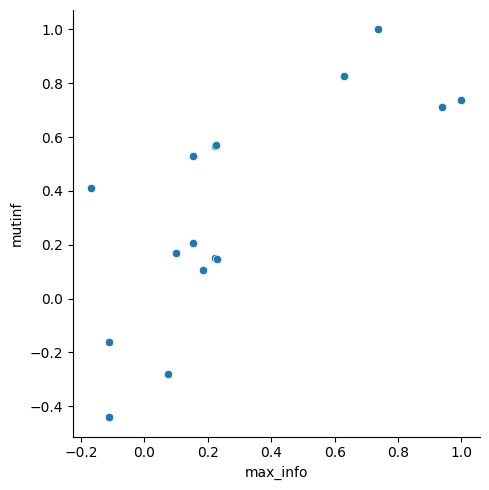

In [22]:
# Checar variables colineales
sns.relplot(data=train_m, x="max_info", y="mutinf")

In [23]:
#X_dev = np.array(dev.drop(['CLASS'],axis=1))
#y_d = np.array(dev['CLASS'])

In [24]:
# SICK
y_train=[]
for i in y_:
    if i == "ENTAILMENT":
        y_train.append(1)
    else:
        y_train.append(0)

In [25]:
scaler = preprocessing.MaxAbsScaler().fit(X)
X_scaled = scaler.transform(X)
X = X_scaled
X_train=X

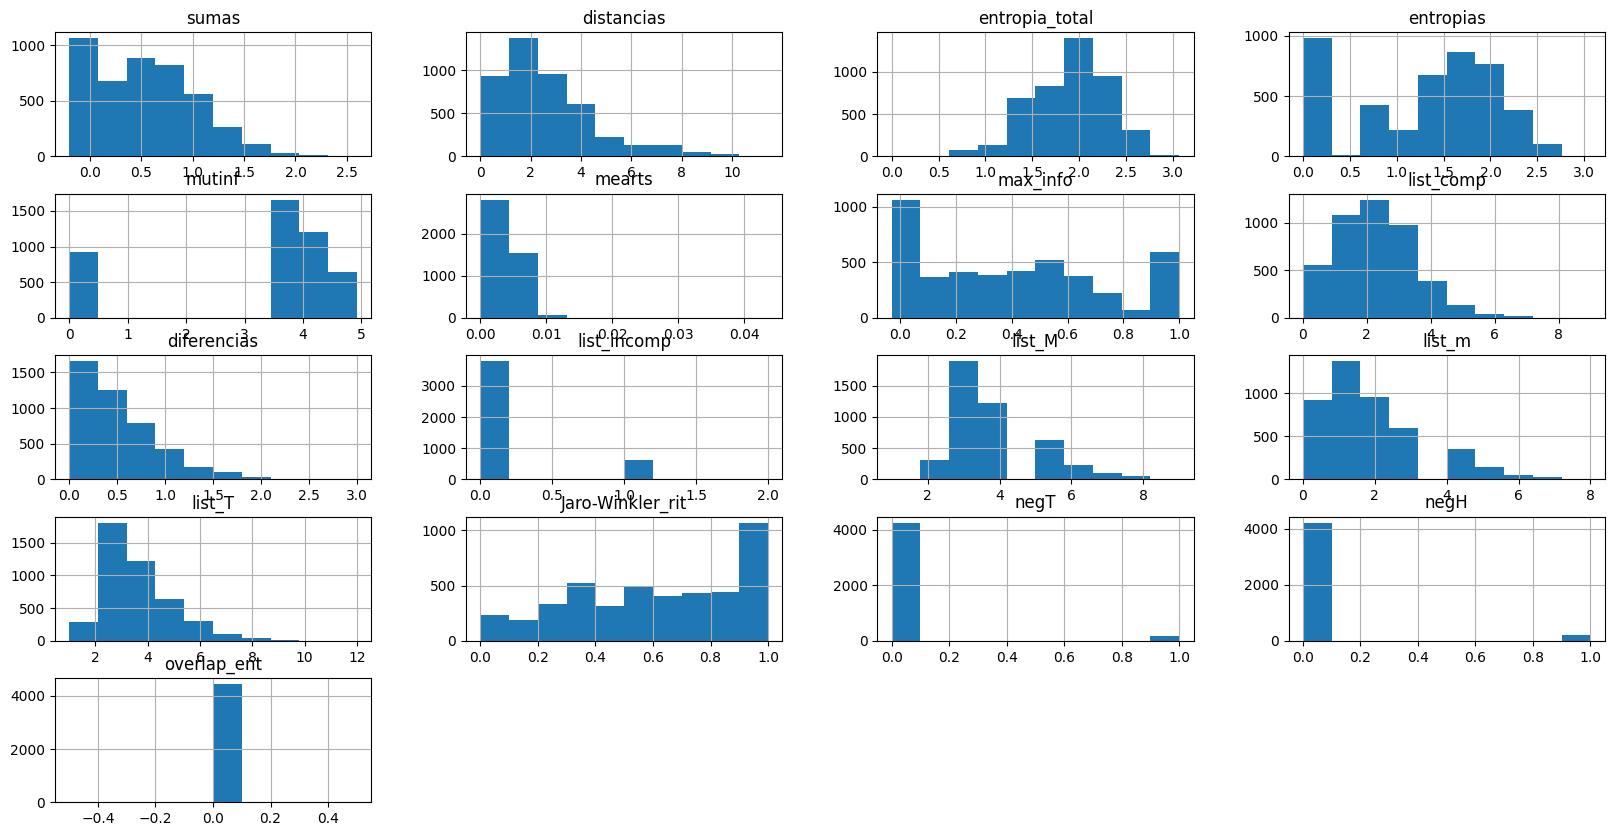

In [26]:
train.hist(figsize=(20,10))
plt.show()

# TEST

In [27]:
for i in range(50):
    if i==0:
        test = pd.read_pickle('salida/nuevo4d/SICK/TEST_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo4d/SICK/TEST_'+str(i+1)+'.csv_.pickle')
            test=pd.concat([test,temp])
        except:
            pass

In [28]:
test = test.reset_index(drop=True)
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,verbT,negH,verbH,overlap_ent,clases
0,0.667679,8.489227,2.466,2.305,4.093067,0.004407,0.438156,1,1.500000,0,7,6,4,0.363281,0,,0,,0.0,CONTRADICTION
1,1.218711,4.208508,1.848,1.796,4.438534,0.001951,0.690963,1,0.428571,0,4,3,7,0.679688,0,,0,,0.0,CONTRADICTION
2,1.060660,4.262156,1.999,1.875,4.137143,0.003433,0.572392,1,0.428571,0,4,3,7,0.425223,0,,0,,0.0,CONTRADICTION
3,1.287754,1.387946,1.722,1.459,4.737481,0.000000,1.000000,5,0.166667,0,6,1,6,1.000000,0,,0,,0.0,ENTAILMENT
4,0.154281,1.437611,1.683,1.000,3.978109,0.006914,0.074974,5,0.166667,0,6,1,6,0.857143,0,,0,,0.0,CONTRADICTION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4901,0.444339,5.694080,1.819,1.875,4.151277,0.003913,0.366969,1,1.000000,0,5,4,4,0.250000,0,,0,,0.0,CONTRADICTION
4902,-0.027272,2.915118,1.781,1.061,3.717898,0.005539,0.061057,1,0.500000,0,3,2,4,0.242188,0,,0,,0.0,CONTRADICTION
4903,0.031951,4.279351,0.503,0.503,3.635724,0.006463,0.029599,0,1.000000,0,3,3,3,0.000000,0,,0,,0.0,CONTRADICTION
4904,0.295858,7.174426,1.498,1.498,3.897945,0.006312,0.159413,0,1.000000,0,5,5,5,0.333984,0,,0,,0.0,CONTRADICTION


In [29]:
test=test.drop(["verbH","verbT"],axis=1)
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases
0,0.667679,8.489227,2.466,2.305,4.093067,0.004407,0.438156,1,1.500000,0,7,6,4,0.363281,0,0,0.0,CONTRADICTION
1,1.218711,4.208508,1.848,1.796,4.438534,0.001951,0.690963,1,0.428571,0,4,3,7,0.679688,0,0,0.0,CONTRADICTION
2,1.060660,4.262156,1.999,1.875,4.137143,0.003433,0.572392,1,0.428571,0,4,3,7,0.425223,0,0,0.0,CONTRADICTION
3,1.287754,1.387946,1.722,1.459,4.737481,0.000000,1.000000,5,0.166667,0,6,1,6,1.000000,0,0,0.0,ENTAILMENT
4,0.154281,1.437611,1.683,1.000,3.978109,0.006914,0.074974,5,0.166667,0,6,1,6,0.857143,0,0,0.0,CONTRADICTION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4901,0.444339,5.694080,1.819,1.875,4.151277,0.003913,0.366969,1,1.000000,0,5,4,4,0.250000,0,0,0.0,CONTRADICTION
4902,-0.027272,2.915118,1.781,1.061,3.717898,0.005539,0.061057,1,0.500000,0,3,2,4,0.242188,0,0,0.0,CONTRADICTION
4903,0.031951,4.279351,0.503,0.503,3.635724,0.006463,0.029599,0,1.000000,0,3,3,3,0.000000,0,0,0.0,CONTRADICTION
4904,0.295858,7.174426,1.498,1.498,3.897945,0.006312,0.159413,0,1.000000,0,5,5,5,0.333984,0,0,0.0,CONTRADICTION


In [30]:
#test=test.drop(["sumas","mutinf","list_comp","list_incomp","entidades","entropia_total","list_rel_con",'mearts', 'max_info', 'similitud_faltantes','list_rel_con', 'list_M', 'list_m', 'list_T', 'list_bigram','diferencias'],axis=1)
#test=test[['list_comp', 'list_incomp','list_m','negT', 'negH',"clases"]]
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases
0,0.667679,8.489227,2.466,2.305,4.093067,0.004407,0.438156,1,1.500000,0,7,6,4,0.363281,0,0,0.0,CONTRADICTION
1,1.218711,4.208508,1.848,1.796,4.438534,0.001951,0.690963,1,0.428571,0,4,3,7,0.679688,0,0,0.0,CONTRADICTION
2,1.060660,4.262156,1.999,1.875,4.137143,0.003433,0.572392,1,0.428571,0,4,3,7,0.425223,0,0,0.0,CONTRADICTION
3,1.287754,1.387946,1.722,1.459,4.737481,0.000000,1.000000,5,0.166667,0,6,1,6,1.000000,0,0,0.0,ENTAILMENT
4,0.154281,1.437611,1.683,1.000,3.978109,0.006914,0.074974,5,0.166667,0,6,1,6,0.857143,0,0,0.0,CONTRADICTION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4901,0.444339,5.694080,1.819,1.875,4.151277,0.003913,0.366969,1,1.000000,0,5,4,4,0.250000,0,0,0.0,CONTRADICTION
4902,-0.027272,2.915118,1.781,1.061,3.717898,0.005539,0.061057,1,0.500000,0,3,2,4,0.242188,0,0,0.0,CONTRADICTION
4903,0.031951,4.279351,0.503,0.503,3.635724,0.006463,0.029599,0,1.000000,0,3,3,3,0.000000,0,0,0.0,CONTRADICTION
4904,0.295858,7.174426,1.498,1.498,3.897945,0.006312,0.159413,0,1.000000,0,5,5,5,0.333984,0,0,0.0,CONTRADICTION


In [31]:
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases
0,0.667679,8.489227,2.466,2.305,4.093067,0.004407,0.438156,1,1.500000,0,7,6,4,0.363281,0,0,0.0,CONTRADICTION
1,1.218711,4.208508,1.848,1.796,4.438534,0.001951,0.690963,1,0.428571,0,4,3,7,0.679688,0,0,0.0,CONTRADICTION
2,1.060660,4.262156,1.999,1.875,4.137143,0.003433,0.572392,1,0.428571,0,4,3,7,0.425223,0,0,0.0,CONTRADICTION
3,1.287754,1.387946,1.722,1.459,4.737481,0.000000,1.000000,5,0.166667,0,6,1,6,1.000000,0,0,0.0,ENTAILMENT
4,0.154281,1.437611,1.683,1.000,3.978109,0.006914,0.074974,5,0.166667,0,6,1,6,0.857143,0,0,0.0,CONTRADICTION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4901,0.444339,5.694080,1.819,1.875,4.151277,0.003913,0.366969,1,1.000000,0,5,4,4,0.250000,0,0,0.0,CONTRADICTION
4902,-0.027272,2.915118,1.781,1.061,3.717898,0.005539,0.061057,1,0.500000,0,3,2,4,0.242188,0,0,0.0,CONTRADICTION
4903,0.031951,4.279351,0.503,0.503,3.635724,0.006463,0.029599,0,1.000000,0,3,3,3,0.000000,0,0,0.0,CONTRADICTION
4904,0.295858,7.174426,1.498,1.498,3.897945,0.006312,0.159413,0,1.000000,0,5,5,5,0.333984,0,0,0.0,CONTRADICTION


In [32]:
X_t = test.drop(['clases'],axis=1)
y_t = test['clases']

In [33]:
# SICK
y_test=[]
for i in y_t:
    if i == "ENTAILMENT":
        y_test.append(1)
    else:
        y_test.append(0)

In [34]:
y_test.count(1)

1404

In [35]:
y_test.count(0)

3502

In [36]:
scaler = preprocessing.MaxAbsScaler().fit(X_t)
X_scaled = scaler.transform(X_t)
X_test = X_scaled

# MODELO DE REGRESIÓN LÓGISTICA

In [37]:
# grid={"C":np.logspace(-3,3,7), "penalty":["l2"]}# l1 lasso l2 ridge
# logreg=linear_model.LogisticRegression()
# logreg_cv=GridSearchCV(logreg,grid,cv=20)
# logreg_cv.fit(X_train,y_train)

In [38]:
# print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
# print("accuracy :",logreg_cv.best_score_)

In [39]:
#X_train = np.where(np.isnan(X_train), 0, X_train)
#X_train

In [40]:
X_train.shape

(4439, 17)

In [41]:
model = LogisticRegression(penalty="l2", C=1)
model.fit(X_train,y_train)

LogisticRegression(C=1)

In [42]:
model.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [43]:
model.decision_function(X)

array([ 0.25249975, -0.16076089, -0.02347422, ..., -4.95847592,
       -2.45781032, -3.45046596])

In [44]:
labels=train.columns[:-1]
labels

Index(['sumas', 'distancias', 'entropia_total', 'entropias', 'mutinf',
       'mearts', 'max_info', 'list_comp', 'diferencias', 'list_incomp',
       'list_M', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'negT', 'negH',
       'overlap_ent'],
      dtype='object')

In [45]:
model.classes_

array([0, 1])

In [46]:
model.coef_[0]

array([ 2.14638557, -1.30092637,  0.25685874,  0.34624022, -2.71939519,
        0.28862829,  0.6760706 ,  1.38317419, -1.98406045, -0.38605465,
        0.26908485, -1.25335051, -1.17433133,  0.91749526, -4.36304652,
       -2.6490353 ,  0.        ])

In [47]:
coeficientes=model.coef_[0]

In [48]:
coeficientes

array([ 2.14638557, -1.30092637,  0.25685874,  0.34624022, -2.71939519,
        0.28862829,  0.6760706 ,  1.38317419, -1.98406045, -0.38605465,
        0.26908485, -1.25335051, -1.17433133,  0.91749526, -4.36304652,
       -2.6490353 ,  0.        ])

In [49]:
print("Maximo,minimo ",np.argmax(coeficientes),labels[np.argmax(coeficientes)],np.argmin(coeficientes),labels[np.argmin(coeficientes)])

Maximo,minimo  0 sumas 14 negT


In [50]:
n_columns=train.shape[1]-1

In [51]:
n_columns

17

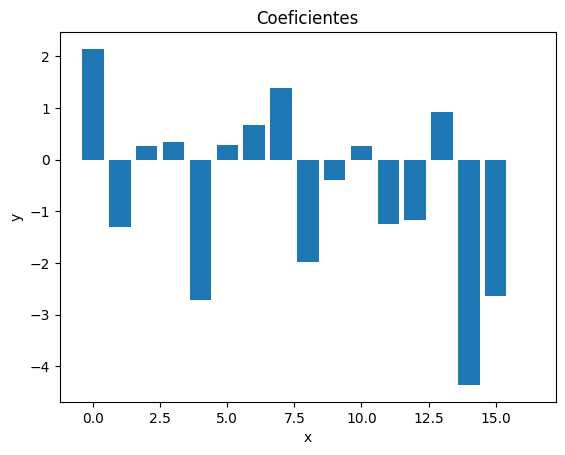

In [52]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = coeficientes

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coeficientes')
plt.show()

In [53]:
#X_test = np.where(np.isnan(X_test), 0, X_test)
#X_test

In [54]:
X_test.shape

(4906, 17)

In [55]:
predictions = model.predict(X_test)

In [56]:
test["predictions"]=predictions
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases,predictions
0,0.667679,8.489227,2.466,2.305,4.093067,0.004407,0.438156,1,1.500000,0,7,6,4,0.363281,0,0,0.0,CONTRADICTION,0
1,1.218711,4.208508,1.848,1.796,4.438534,0.001951,0.690963,1,0.428571,0,4,3,7,0.679688,0,0,0.0,CONTRADICTION,0
2,1.060660,4.262156,1.999,1.875,4.137143,0.003433,0.572392,1,0.428571,0,4,3,7,0.425223,0,0,0.0,CONTRADICTION,0
3,1.287754,1.387946,1.722,1.459,4.737481,0.000000,1.000000,5,0.166667,0,6,1,6,1.000000,0,0,0.0,ENTAILMENT,0
4,0.154281,1.437611,1.683,1.000,3.978109,0.006914,0.074974,5,0.166667,0,6,1,6,0.857143,0,0,0.0,CONTRADICTION,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4901,0.444339,5.694080,1.819,1.875,4.151277,0.003913,0.366969,1,1.000000,0,5,4,4,0.250000,0,0,0.0,CONTRADICTION,0
4902,-0.027272,2.915118,1.781,1.061,3.717898,0.005539,0.061057,1,0.500000,0,3,2,4,0.242188,0,0,0.0,CONTRADICTION,0
4903,0.031951,4.279351,0.503,0.503,3.635724,0.006463,0.029599,0,1.000000,0,3,3,3,0.000000,0,0,0.0,CONTRADICTION,0
4904,0.295858,7.174426,1.498,1.498,3.897945,0.006312,0.159413,0,1.000000,0,5,5,5,0.333984,0,0,0.0,CONTRADICTION,0


In [57]:
test[(test["clases"]=="ENTAILMENT") & (test["predictions"]==0)]

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases,predictions
3,1.287754,1.387946,1.722,1.459,4.737481,0.000000,1.000000,5,0.166667,0,6,1,6,1.000000,0,0,0.0,ENTAILMENT,0
9,0.613314,1.434262,2.373,1.371,3.806307,0.011695,0.514878,4,0.200000,1,5,1,5,0.997396,0,0,0.0,ENTAILMENT,0
17,1.630749,2.859189,2.594,2.842,4.232853,0.002819,0.717209,3,0.285714,0,5,2,7,0.476562,0,0,0.0,ENTAILMENT,0
24,0.606271,2.738904,1.530,1.459,4.328277,0.002216,0.543972,1,0.666667,0,3,2,3,0.800000,0,0,0.0,ENTAILMENT,0
37,1.098593,2.894400,1.500,1.500,4.709748,0.000000,1.000000,2,0.500000,0,4,2,4,0.821429,0,0,0.0,ENTAILMENT,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4758,0.681361,1.395629,2.258,1.522,3.698040,0.003014,0.404334,4,0.200000,0,5,1,5,0.857143,0,0,0.0,ENTAILMENT,0
4760,0.833027,2.799807,2.082,1.685,4.249284,0.002381,0.577694,3,0.400000,0,5,2,5,0.710938,0,0,0.0,ENTAILMENT,0
4763,1.020912,1.407914,1.224,0.918,4.769791,0.000000,1.000000,2,0.333333,0,3,1,3,0.833333,0,0,0.0,ENTAILMENT,0
4772,0.722803,2.883180,2.412,2.355,3.933872,0.006459,0.337537,1,0.333333,0,3,2,6,0.745117,0,0,0.0,ENTAILMENT,0


In [58]:
#test.to_csv("predictions_SICK_DEV.csv")

In [59]:
print(confusion_matrix(y_test, predictions,labels=[1,0]))

[[ 782  622]
 [ 249 3253]]


In [60]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions),2))
print("recall",round(recall_score(y_test,predictions),2))
print("f1_score: ",round(f1_score(y_test,predictions),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.82
precision:  0.76
recall 0.56
f1_score:  0.64
matthews_score:  0.54


In [61]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions,average="micro"),2))
print("recall",round(recall_score(y_test,predictions,average="micro"),2))
print("f1_score: ",round(f1_score(y_test,predictions,average="micro"),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.82
precision:  0.82
recall 0.82
f1_score:  0.82
matthews_score:  0.54


In [62]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions,average="macro"),2))
print("recall",round(recall_score(y_test,predictions,average="macro"),2))
print("f1_score: ",round(f1_score(y_test,predictions,average="macro"),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.82
precision:  0.8
recall 0.74
f1_score:  0.76
matthews_score:  0.54


In [63]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions,average="weighted"),2))
print("recall",round(recall_score(y_test,predictions,average="weighted"),2))
print("f1_score: ",round(f1_score(y_test,predictions,average="weighted"),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.82
precision:  0.82
recall 0.82
f1_score:  0.81
matthews_score:  0.54


In [64]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions,average="binary"),2))
print("recall",round(recall_score(y_test,predictions,average="binary"),2))
print("f1_score: ",round(f1_score(y_test,predictions,average="binary"),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.82
precision:  0.76
recall 0.56
f1_score:  0.64
matthews_score:  0.54


In [66]:
X_train.shape

(4439, 17)

In [67]:
X_test.shape

(4906, 17)

In [68]:
X_cv=np.concatenate((X_train, X_test), axis=0)
Y_cv=np.concatenate((y_train, y_test), axis=0)

In [69]:
#validation_size = 0.20
#X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)
X_train_cv=X_cv
Y_train_cv=Y_cv

In [70]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name + " Acurracy:" , round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_weighted')
msg += "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_weighted')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_weighted')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression Acurracy:: 0.810000 (0.026967)
Logistic Regression Precision:: 0.810000 (0.027921)
Logistic Regression Recall:: 0.810000 (0.026967)
Logistic Regression F1-score:: 0.810000 (0.028866)


In [71]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_macro')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_macro')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_macro')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Precision:: 0.780000 (0.033196)
Logistic Regression Recall:: 0.730000 (0.040024)
Logistic Regression F1-score:: 0.750000 (0.038863)


In [76]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Precision:: 0.720000 (0.056900)
Logistic Regression Recall:: 0.550000 (0.082673)
Logistic Regression F1-score:: 0.620000 (0.072527)


In [73]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_micro')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_micro')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_micro')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Precision:: 0.810000 (0.026967)
Logistic Regression Recall:: 0.810000 (0.026967)
Logistic Regression F1-score:: 0.810000 (0.026967)


In [74]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='matthews_corrcoef')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.510000 (0.072756)


In [74]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [125]:
#linear_model

In [126]:
# model = LogisticRegression()
# model.fit(X_train,y_train)

In [75]:
y_predict = model.predict(X_test)
print(classification_report( y_test,y_predict))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      3502
           1       0.76      0.56      0.64      1404

    accuracy                           0.82      4906
   macro avg       0.80      0.74      0.76      4906
weighted avg       0.82      0.82      0.81      4906



In [76]:
explainer = shap.Explainer(model,X_train,feature_names=test.columns[:-1])
shap_values = explainer(X_test)

In [77]:
test.columns[:-1]

Index(['sumas', 'distancias', 'entropia_total', 'entropias', 'mutinf',
       'mearts', 'max_info', 'list_comp', 'diferencias', 'list_incomp',
       'list_M', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'negT', 'negH',
       'overlap_ent', 'clases'],
      dtype='object')

In [78]:
explainer.expected_value

-1.4506692122373674

In [79]:
X_test

array([[0.16892324, 0.39536554, 0.68290291, ..., 0.        , 0.        ,
        0.        ],
       [0.14394303, 0.19964858, 0.65969271, ..., 0.        , 0.        ,
        0.66666667],
       [0.14680285, 0.19868131, 0.63779013, ..., 0.        , 0.        ,
        0.33333333],
       ...,
       [0.03848948, 0.40251367, 0.24452435, ..., 0.        , 0.        ,
        0.        ],
       [0.17190848, 0.5908503 , 0.45537757, ..., 0.        , 0.        ,
        0.        ],
       [0.08931331, 0.4069092 , 0.52598889, ..., 0.        , 0.        ,
        0.        ]])

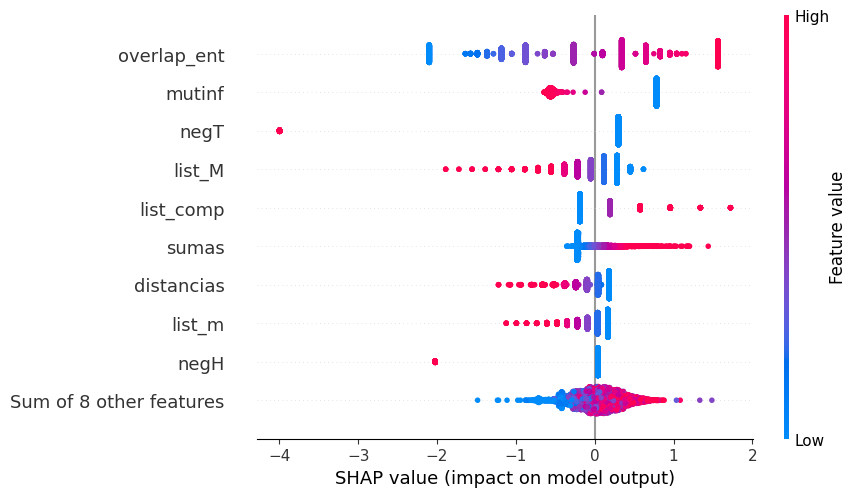

In [81]:
shap.plots.beeswarm(shap_values)

In [133]:
ind = 21
print(X_test[ind],y_test[ind],y_predict[ind])
shap.plots.force(shap_values[ind])
shap.plots.waterfall(shap_values[ind])

[0.4751967  0.24555819 0.87544949 0.78537126 0.93112685 0.10731264
 0.47481402 0.25       0.0952381  0.         0.375      0.25
 0.4        0.83333333 0.         0.         0.25      ] 0 0


IndexError: index 17 is out of bounds for axis 0 with size 17

In [134]:
ind = 6
print(X_test[ind])
# This amazing documentary gives us a glimpse into the lives of the brave
# women in Cameroun's judicial system-- policewomen, lawyers and judges. Despite
# tremendous difficulties-- lack of means, the desperate poverty of the people, multiple
# languages and multiple legal precedents depending on the region of the country and
# the religious/ethnic background of the plaintiffs and defendants-- these brave,
# strong women are making a difference. [...]

shap.plots.waterfall(shap_values[ind,:,1])

[0.12572709 0.25258803 0.53743053 0.46693757 0.95367512 0.16914902
 0.12524514 0.         0.08163265 0.         0.1875     0.25
 0.46666667 0.33333333 0.         0.         0.        ]


IndexError: index 1 is out of bounds for axis 2 with size 1

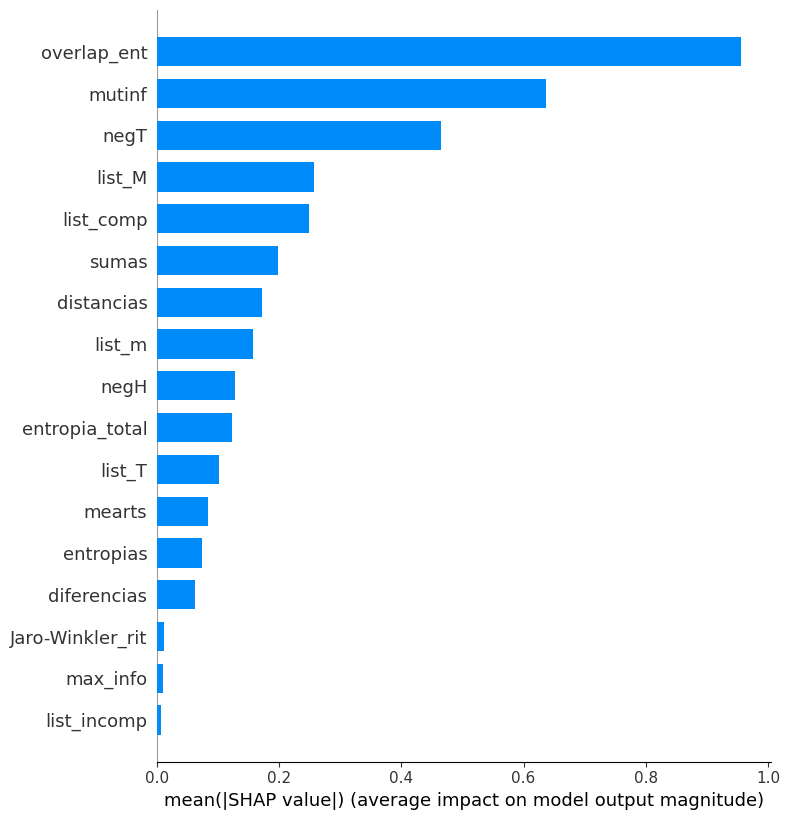

In [82]:
shap.summary_plot(shap_values, X_test,plot_type="bar")

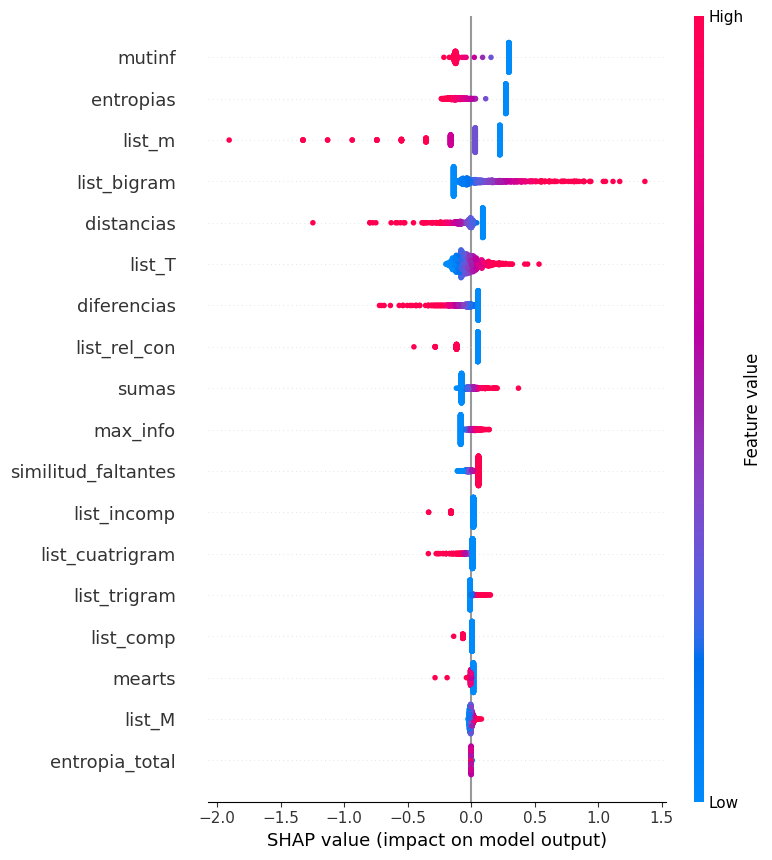

In [81]:
shap.summary_plot(shap_values[1:,], X_test[1:,])

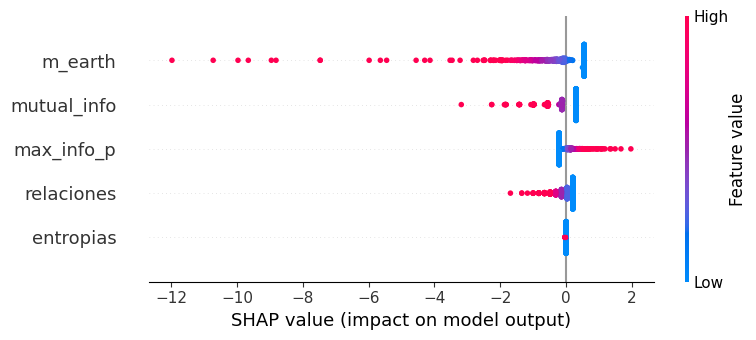

In [ ]:
shap.summary_plot(shap_values, X_test,feature_names=test.columns[:-1])

In [ ]:
shap_values[2:,]

.values =
array([[ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [-0.01299836, -0.11268555, -0.4045574 ,  0.04382668,  0.21114683],
       ...,
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683]])

.base_values =
array([-0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.745

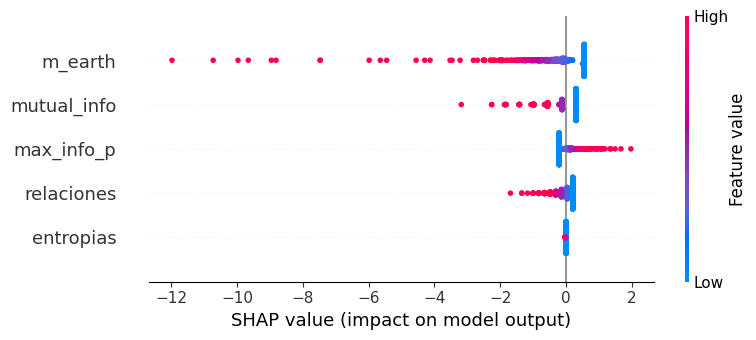

In [ ]:
shap.summary_plot(shap_values[0:,], X_test,feature_names=test.columns[:-1])

In [ ]:
explainer.expected_value

-0.7454438806409415

In [ ]:
shap_values.shape

(800, 5)

# Árbol de decisión

In [83]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [84]:
clf = DecisionTreeClassifier(splitter="random")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [85]:
print("acccuracy: ",round(accuracy_score(y_test,y_pred),2))
print("precision: ",round(precision_score(y_test,y_pred),2))
print("recall",round(recall_score(y_test,y_pred),2))
print("f1_score: ",round(f1_score(y_test,y_pred),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,y_pred),2))

acccuracy:  0.78
precision:  0.61
recall 0.69
f1_score:  0.65
matthews_score:  0.49


In [86]:
validation_size = 0.01
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)

In [87]:
name='DecisionTree'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

DecisionTree: 0.670000 (0.048836)
DecisionTree: 0.660000 (0.035226)
DecisionTree: 0.670000 (0.033797)


In [88]:
c=train.columns[:-1]
confusion_matrix(y_test,y_pred)

array([[2874,  628],
       [ 434,  970]])

Profundidad del árbol: 29
Número de nodos terminales: 1014


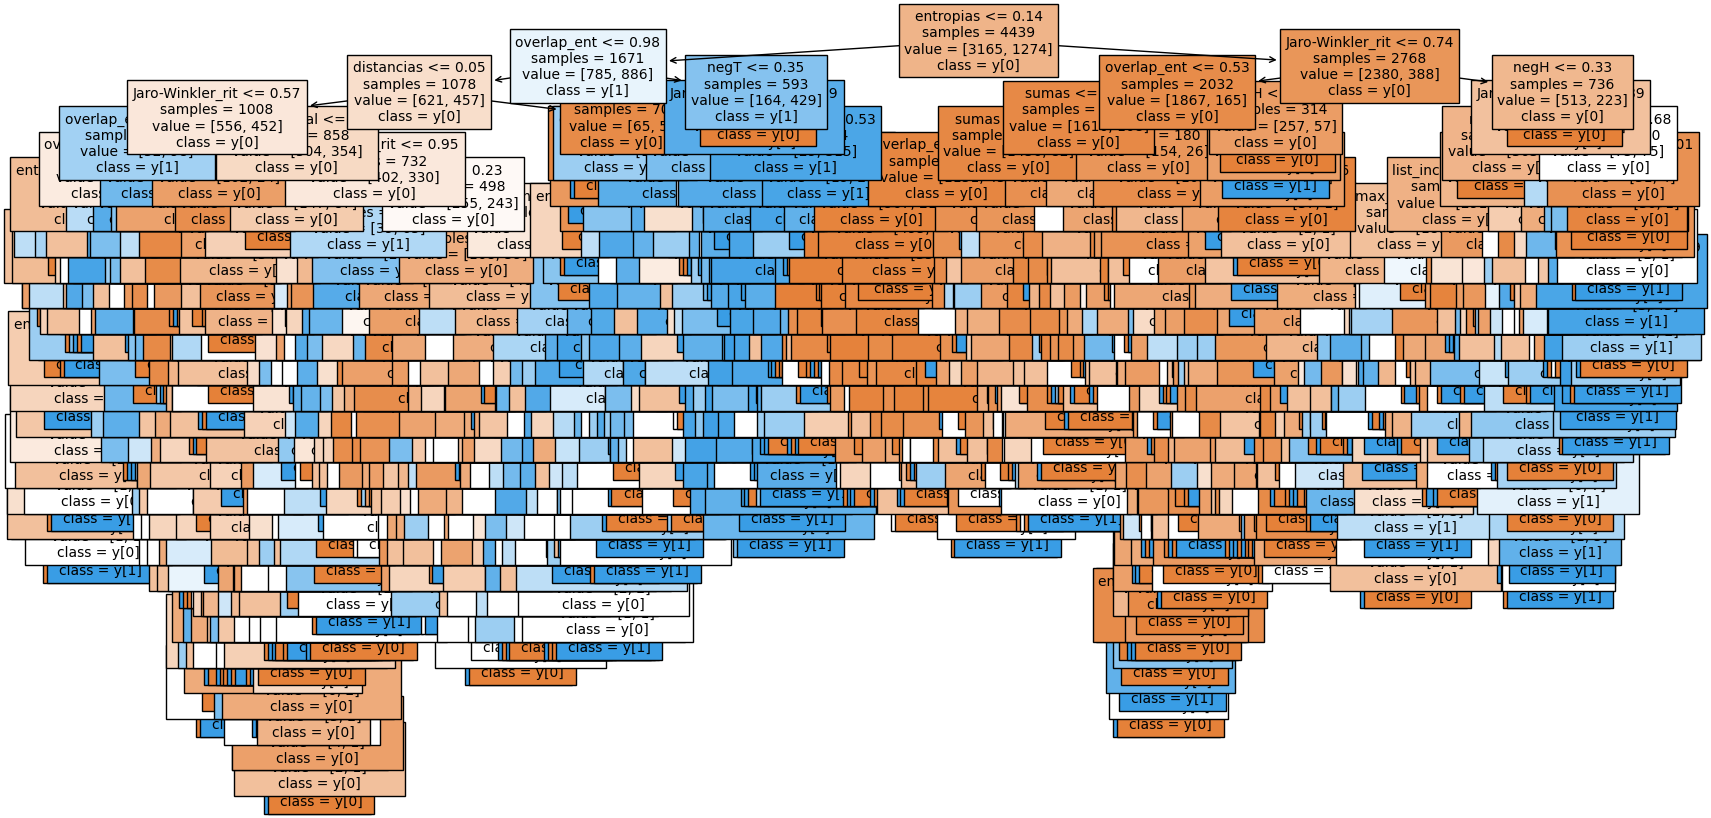

In [89]:
# Estructura del árbol creado
import matplotlib.pyplot as plt
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(20, 10))

print(f"Profundidad del árbol: {clf.get_depth()}")
print(f"Número de nodos terminales: {clf.get_n_leaves()}")

plot = plot_tree(
            decision_tree = clf,
            feature_names = c,
            class_names   = True,
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )